# Wrangling & EDA

## 1. Loading Packages

In [1]:
#Write code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

## 2. Loading Data & Basic Analysis

- **Task 1**:Load the data and after making a copy of it, find **shape, data types, basic statistics, and null values** from the data set

In [2]:
# Load the data
data= pd.read_csv('HR_comma_sep.csv')
df=data.copy()

In [3]:
# Find the shape
df.shape

(14999, 10)

In [4]:
# Display the top 5 rows.
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
# Find the data types of columns
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
dept                      object
salary                    object
dtype: object

In [6]:
# Find the basic statistics
df.describe(include="all")

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


In [7]:
# Find the null values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64

# 3. Exploration

Before moving ahead, let us check the details of different variables in the data

**Task 2: Plot/Find out the how many employees left the company?**

0    11428
1     3571
Name: left, dtype: int64

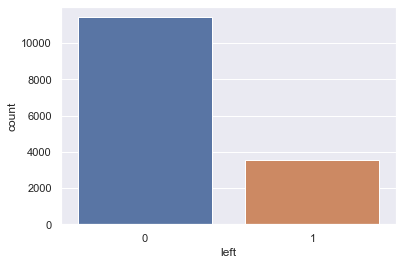

In [8]:
# Count of how many employees left the company
sns.countplot(x='left',data=df);
df.left.value_counts()

**Question:What can you interpret from the plot above?** 

Answer: The number of employees who left the company are 3571 less as compared to the employees not left.

**Task 3: Plot/Find out the number of projects being handled.**

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64

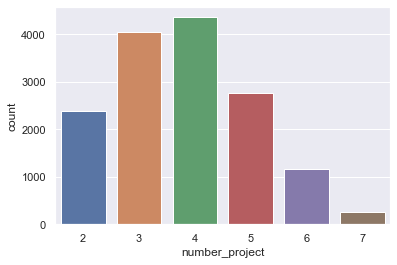

In [9]:
# Write code here
sns.countplot(x='number_project',data=df);
df.number_project.value_counts()

**Question: What insights can you infer from the above plot?**

Answer: The project number 4 is handled by most of the employees however, 7 is done by few employees.

**Task 4: Find out how number of projects contributed to employee turn-over.**
<br>
<br>

*Now we want to see how number of projects contribute to employee turn-over.<br> For this purpose, we can do a groupby. The final results will show the of employees leaving the company against each number of projects .*

In [10]:
df.groupby(['left','number_project']).count()

satisfaction_level  last_evaluation  \
left number_project                                        
0    2                              821              821   
     3                             3983             3983   
     4                             3956             3956   
     5                             2149             2149   
     6                              519              519   
1    2                             1567             1567   
     3                               72               72   
     4                              409              409   
     5                              612              612   
     6                              655              655   
     7                              256              256   

                     average_montly_hours  time_spend_company  Work_accident  \
left number_project                                                            
0    2                                821                 821            821   
     3                               3983                3983           3983   
     4                               3956                3956           3956   
     5                               2149                2149           2149   
     6                                519                 519            519   
1    2                               1567                1567           1567   
     3                                 72                  72             72   
     4                                409                 409            409   
     5                                612                 612            612   
     6                                655                 655            655   
     7                                256                 256            256   

                     promotion_last_5years  dept  salary  
left number_project                                       
0    2                                 821   821     821  
     3                                3983  3983    3983  
     4                                3956  3956    3956  
     5                                2149  2149    2149  
     6                                 519   519     519  
1    2                                1567  1567    1567  
     3                                  72    72      72  
     4                                 409   409     409  
     5                                 612   612     612  
     6                                 655   655     655  
     7                                 256   256     256

**Task 5:** Make a plot of your findings (only turn-over employees)

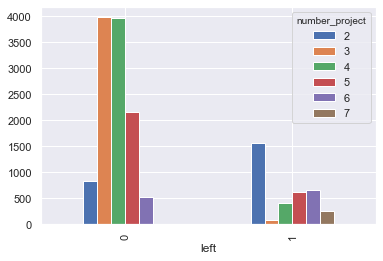

In [11]:
pd.crosstab(df.left,df.number_project).plot(kind='bar');

**Question: What can you conclude from the above graph? Which people are leaving the company(as per number of projects)? What can be the reasons behind?**

Answer: The people with project 2 are mostly leaving the company. 

## **Time spent at the company**

**Task 6: Find out how time spend at company can lead to employee turn over. Show the following plots.**<br>
- Count of Number of years spent by employees.
- After how many years are mostly employees leaving the company? 

*Hint: For the second part do the similar procedure as done in case of 'number_projects' above. Try to find the **percetage** to show that after how much time/years did most of employees exactly leave.*

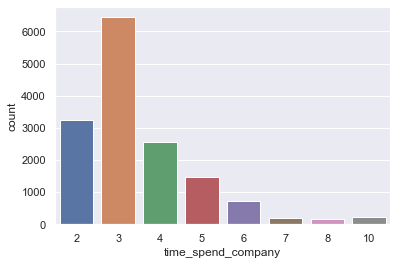

In [12]:
# Show the plot for the count of years here
sns.countplot(x='time_spend_company',data=df);

**Question: What is the maximum number of time spend by the employees?**

Answer: The maximum time spend my the employee is 3.

In [13]:
# Write the code here to get the percentage of employees leaving
df['left'].value_counts(normalize=True) * 100

0    76.191746
1    23.808254
Name: left, dtype: float64

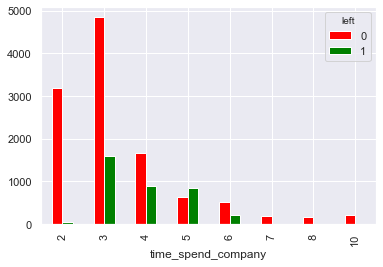

In [14]:
# Write the code here to draw a bar plot showing years after which employees are likely to leave
pd.crosstab(df.time_spend_company,df.left).plot(kind='bar',color=('red','green'))
plt.show()

**Question: After what time period are employees most likely to leave the company ?**

Answer:After time period 3 mostly employees leave the company.

## **Employees engaged in any work accident**

**Task 7: Find out that how many employees were engaged in work accident and how many of them actually left? Use count plots to show your results**

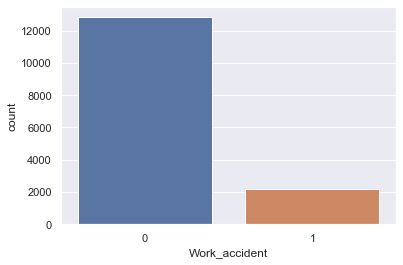

In [15]:
# Number of employees involved in work accident
sns.countplot(x='Work_accident',data=df);

**Question: What can you conclude from the graph above?**

Answer: The mostly people are not part of the company.

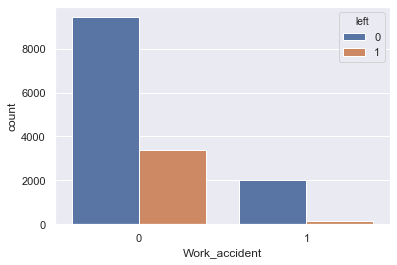

In [16]:
# Number of employees involved in work accident and left or not left
sns.countplot(x='Work_accident',hue='left',data=df);

## **Promotions in last 5 years**

**Task 8: Plot How many number of employees got the promotion in last 5 year and how many of them left?**

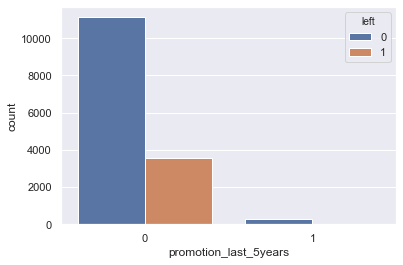

In [17]:
# Write code here
sns.countplot(x='promotion_last_5years',hue='left',data=df);

## **Salary trends**

**Task 9: What are the salary trends in the data? Use graphical representation for explanation**

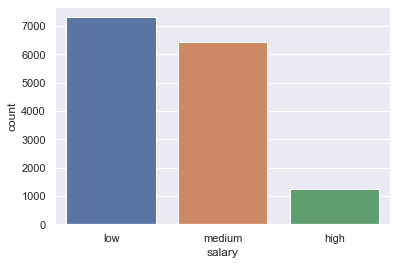

In [18]:
#Write code here
sns.countplot(x='salary',data=df);

**Quesion: Which type salary holders are most likely to leave? Try to show the percentage of employees who left according to their salaries, using a bar plot or as you like.**

In [19]:
# Write code here
percent=df.groupby('left')['salary'].value_counts(normalize=True)*100
percent

left  salary
0     low       45.012251
      medium    44.880994
      high      10.106755
1     low       60.823299
      medium    36.880426
      high       2.296276
Name: salary, dtype: float64

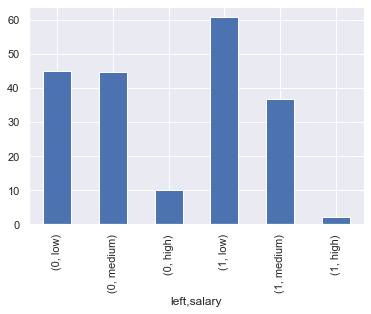

In [20]:
# Write code here for plot
percent.plot(kind='bar');

**Question: What does the above plot show?**

Answer: The people with low salary are tend to leave company mostly.

## **Employees per Department**

**Task 10: Plot/Find out employees per department and also see which which department has highest number of employees leaving the company.**

In [21]:
# Write the code here to check employee count in each department. You can use a graphical representation or use simple code to check.
df['dept'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: dept, dtype: int64

**Question: Which department has maximum number of employees?**

Answer: The sales department has maximum number of employees.

**Question: Which department has highest percentage of turn-over? Use graphical representation to find out.**

In [22]:
# Write code here
per=df.groupby('dept')['left'].value_counts(normalize=True)*100
per

dept         left
IT           0       77.750611
             1       22.249389
RandD        0       84.625159
             1       15.374841
accounting   0       73.402868
             1       26.597132
hr           0       70.906631
             1       29.093369
management   0       85.555556
             1       14.444444
marketing    0       76.340326
             1       23.659674
product_mng  0       78.048780
             1       21.951220
sales        0       75.507246
             1       24.492754
support      0       75.100942
             1       24.899058
technical    0       74.375000
             1       25.625000
Name: left, dtype: float64

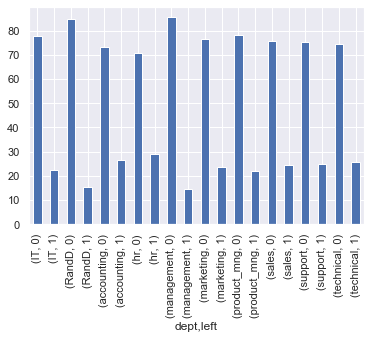

In [23]:
# Write code here to draw the plot
per.plot(kind='bar');

## **Satisfaction Level**

**Task 11: Show the satisfaction level of employees who left the company and those who didn't leave, using a kde plot**

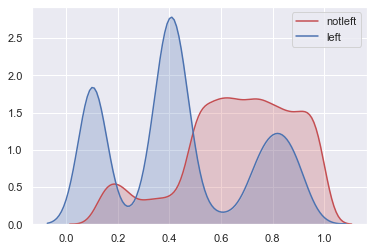

In [24]:
# Write the code here
sns.kdeplot(df.loc[(df['left']==0), 'satisfaction_level'], color='r', shade=True, Label='notleft') 
  
sns.kdeplot(df.loc[(df['left']==1), 'satisfaction_level'], color='b', shade=True, Label='left') 

**Question: What can you conclude from the plot above?**

Answer: The employees who left the company showed different levels however they are most satisfied as compare to the not left ones.

# Feature Engineering

For feature engineering we will two new features. Looking at the the satisfcation we can conclude that people who are leaving have a low satisfaction level, most likely below 0.5 are leaving and people having a high satisfaction_level, most likely above 0.5 are likely to stay. 

**Task 12: Make a new feature 'satisfaction_level_type' through following conditions:**<br>
- **satisfaction_level >= 0.5 then satisfaction_level_type = 'High'**
- **satisfaction_level < 0.5 then satisfaction_level_type = 'Low'**

In [25]:
df['Satisfaction_level_type'] = ['High' if x >= 0.5 else 'Low' for x in df['satisfaction_level']] 

**Task 13: Make a count plot for satisfaction_level_type and and see which type has more turn over using hue='left'**

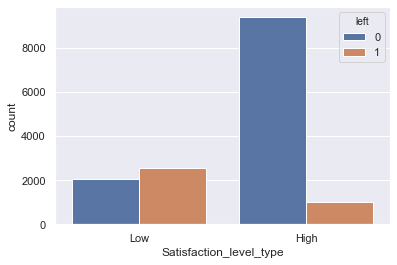

In [26]:
sns.countplot(x='Satisfaction_level_type',hue='left',data=df);

Previously we saw that employees having high number of projects are leaving. We also saw that some employees with extremely less number of projects are also leaving the company. Let us see how number of projects and satisfaction level are related.<br>
We can see this by checking the satisfaction level type and number of projects in according to that specific type. 

In [27]:
# Write Code Here
df.groupby('Satisfaction_level_type')['number_project'].value_counts()

Satisfaction_level_type  number_project
High                     4                 3807
                         3                 3504
                         5                 2281
                         2                  591
                         6                  228
                         7                    5
Low                      2                 1797
                         6                  946
                         4                  558
                         3                  551
                         5                  480
                         7                  251
Name: number_project, dtype: int64

**Make a Plot of your findings**

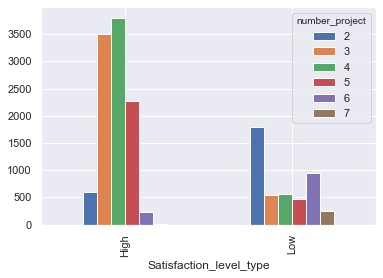

In [28]:
pd.crosstab(df.Satisfaction_level_type,df.number_project).plot(kind='bar');

**Question:** What did you infer drom the above plot

**Answer:** The people with project number 3 and 4 are found to be hihgly satisfied than others.

Now lets check number of projects for low satisfaction level

In [29]:
# Write Code Here
df[(df['Satisfaction_level_type'] == 'Low')]['number_project'].value_counts()

2    1797
6     946
4     558
3     551
5     480
7     251
Name: number_project, dtype: int64

Notice that there is are people associated with low satisfaction level, have either too less projects, i.e. number of projects = 2 or high number of projects i.e. 6 or even 7. The over all count for 7 is low but there is a significant raise if we compare its count with higher satisfaction level.

**Task 14: Make a new column 'employee_type' and assign categories as following:**<br>
- **If number of projects is equal to 2 then employee_type='unburdened'**
- **If number of projects is between 3 and 5 then employee_type = 'Satisfactory'**
- **If number of projects is 6 and above then employee_type='Burdened'**

In [30]:
df['employee_type']=''

In [31]:
# Write code here
conditions = [
    (df['number_project'] == 2),
    (df['number_project'] >= 3) & (df['number_project'] <= 5),
    (df['number_project'] >= 6)
 ]
values=['unburdened', 'satisfactory', 'burdened']
df['employee_type'] = np.select(conditions, values)

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary,Satisfaction_level_type,employee_type
0,0.38,0.53,2,157,3,0,1,0,sales,low,Low,unburdened
1,0.80,0.86,5,262,6,0,1,0,sales,medium,High,satisfactory
2,0.11,0.88,7,272,4,0,1,0,sales,medium,Low,burdened
3,0.72,0.87,5,223,5,0,1,0,sales,low,High,satisfactory
4,0.37,0.52,2,159,3,0,1,0,sales,low,Low,unburdened


**Task 15: Make a countplot to see which type of employee is leaving**

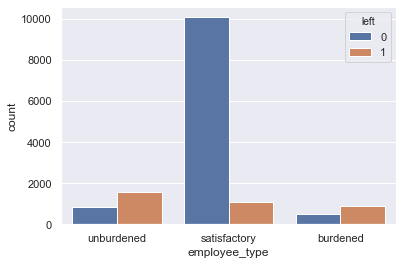

In [32]:
# Write code here
sns.countplot(x='employee_type',hue='left',data=df);

### Remove Redundant Features

Hint: Look for the columns used in Feature Engineering

In [33]:
# Write code here
df=df.drop(['satisfaction_level','number_project'],axis=1)

# Machine Learning

Before moving further, we need to apply one-hot encoding on categorical variables i.e. **dept, salary, satisfaction_level_type,** and **employee_type**

**Task 16: Do ONE HOT ENCODING of the above mentioned variables**

In [34]:
# Write code here
df_OneHot=pd.get_dummies(df,columns=['dept','salary','Satisfaction_level_type','employee_type'])


In [35]:
df_OneHot.head()

,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept_IT,dept_RandD,dept_accounting,dept_hr,...,dept_support,dept_technical,salary_high,salary_low,salary_medium,Satisfaction_level_type_High,Satisfaction_level_type_Low,employee_type_burdened,employee_type_satisfactory,employee_type_unburdened
0,0.53,157,3,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1,0.86,262,6,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
2,0.88,272,4,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3,0.87,223,5,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4,0.52,159,3,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


**Task 17: Creating Independant and Dependant Variables**

In [36]:
# Write code here
X=df_OneHot.drop(['left'], axis=1)
Y = df['left']

**Task 18: Perform Train Test Split with test size 30 percent and random state = 100**

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
#Write code here
xtrain, xtest, ytrain, ytest = train_test_split(
    X, Y, test_size=0.3, random_state=100, shuffle=True)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)


(10499, 23) (10499,)
(4500, 23) (4500,)


In [39]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape,ytest.shape)

(10499, 23) (10499,)
(4500, 23) (4500,)


**Task 19: Get the predictions using the following models.**<br>
- Random Forest
- Logistic Regression
- Ada Boost
- XG Boost

<br> 

**Also get the following scores for each of the above models**
- Accuracy
- Precision
- Recall
- F1-Score
- Classification Report

## Random Forest

In [40]:
# Importing the model from sklearn
from sklearn.ensemble import RandomForestClassifier

In [41]:
# Making instance and training the model
rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)

E:\python\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
# Get predictions
rf_pred=rf.predict(xtest)

**Precision**

In [43]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import precision_score

In [44]:
#Write the code to calculate
rf_precion=precision_score(ytest,rf_pred)

**Accuracy**

In [45]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import accuracy_score

In [46]:
# Write the code to calculate
rf_acc=accuracy_score(ytest,rf_pred)

**Recall**

In [47]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import recall_score

In [48]:
# Write the code to calculate
rf_recall=recall_score(ytest,rf_pred)

**F1-Score**

In [49]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import f1_score

In [50]:
# Write the code to calculate
rf_f1_score=f1_score(ytest,rf_pred)

**Classification Report**

In [51]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import classification_report

In [52]:
#Write the code to calculate
print(classification_report(ytest,rf_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3401
           1       0.97      0.96      0.97      1099

    accuracy                           0.98      4500
   macro avg       0.98      0.97      0.98      4500
weighted avg       0.98      0.98      0.98      4500



## Logistic Regression

In [53]:
# Import the model
from sklearn.linear_model import LogisticRegression

In [54]:
# Create instance and train, random _state=100
lr_model = LogisticRegression(random_state=100)
lr_model.fit(xtrain, ytrain)

E:\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=100, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
# get the predictions
lr_pred=lr_model.predict(xtest)

**Accuracy**

In [56]:
#Write the code here
lr_accuracy= accuracy_score(ytest, lr_pred)
print("Accuracy by built-in function: {}".format(lr_accuracy))

Accuracy by built-in function: 0.86


**Precision**

In [57]:
#Write the code here
lr_precision=precision_score(ytest, lr_pred)
print("Precision by built-in function: {}".format(lr_precision))

Precision by built-in function: 0.7283349561830574


**Recall**

In [58]:
#Write the code here
lr_recall=recall_score(ytest, lr_pred)
print("Recall by built-in function: {}".format(lr_recall))

Recall by built-in function: 0.6806187443130118


**F1 Score**

In [59]:
#Write the code here
lr_f1_score=f1_score(ytest,lr_pred)
print("F1 Score by built-in function: {}".format(lr_f1_score))

F1 Score by built-in function: 0.7036688617121355


**Classification Report**

In [60]:
#Write the code here
print(classification_report(ytest, lr_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      3401
           1       0.73      0.68      0.70      1099

    accuracy                           0.86      4500
   macro avg       0.81      0.80      0.81      4500
weighted avg       0.86      0.86      0.86      4500



## Ada Boost

In [61]:
#Write the code here to import the model
from sklearn.ensemble import AdaBoostClassifier

In [62]:
#Write the code here to make an instance and train the model with random state =100
clf_adb = AdaBoostClassifier(random_state=100)
clf_adb.fit(xtrain, ytrain)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=100)

In [63]:
# Get the predictions
pred_clf_adb=clf_adb.predict(xtest)

**Accuracy**

In [64]:
#Write code here
ab_accuracy= accuracy_score(ytest,pred_clf_adb)
ab_accuracy

0.928

**Precision**

In [65]:
#Write code here
ab_precision= precision_score(ytest, pred_clf_adb)
ab_precision

0.8611369990680335

**Recall**

In [66]:
#Write code here
ab_recall= recall_score(ytest,pred_clf_adb)
ab_recall

0.8407643312101911

**F1-Score**

In [67]:
#Write code here
ab_f1_score=f1_score(ytest, pred_clf_adb)
ab_f1_score

0.850828729281768

**Classification Report**

In [68]:
#Write code here
print(classification_report(ytest,pred_clf_adb))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      3401
           1       0.86      0.84      0.85      1099

    accuracy                           0.93      4500
   macro avg       0.91      0.90      0.90      4500
weighted avg       0.93      0.93      0.93      4500



## XG Boost

In [69]:
#Write the code here to import the model
import xgboost as xgb

In [70]:
#Write the code here to make an instance and train the model with random state =100
clf_xgb = xgb.XGBClassifier(seed=25,nthread=1,random_state=100)
clf_xgb.fit(xtrain, ytrain)

E:\python\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:25:35] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=1, nthread=1, num_parallel_tree=1,
              objective='binary:logistic', random_state=100, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=25, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [71]:
# Get the predictions
pred_clf_xgb=clf_xgb.predict(xtest)

**Accuracy**

In [72]:
#Write code here
xgb_accuracy= accuracy_score(ytest,pred_clf_xgb)
xgb_accuracy

0.9795555555555555

**Precision**

In [73]:
#Write code here
xgb_precision=precision_score(ytest,pred_clf_xgb)


**Recall**

In [74]:
#Write code here
xgb_recall= recall_score(ytest,pred_clf_xgb)


**F1-Score**

In [75]:
#Write code here
xgb_f1_score=f1_score(ytest,pred_clf_xgb)


**Classification Report**

In [76]:
#Write code here
print(classification_report(ytest,pred_clf_xgb))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3401
           1       0.96      0.95      0.96      1099

    accuracy                           0.98      4500
   macro avg       0.97      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500



# Result Comparisons

**Task 20: Do the comparison of the above used models as per the scores found.Make a datafram that shows the models and scores for each models.**

In [78]:
# Write the code here
comparison_dict={"Algorithm":["Random Forest","Logistic Regression","XGBoost","Ada Boost"],
                 "Accuracy":[rf_acc,lr_accuracy,xgb_accuracy,ab_accuracy],
                 "Precision":[rf_precion,lr_precision,xgb_precision,ab_precision],
                 "Recall":[rf_recall,lr_recall,xgb_recall,ab_recall],
                 "F1 Score":[rf_f1_score,lr_f1_score,xgb_f1_score,ab_f1_score]
                }

In [80]:
comparison = pd.DataFrame(comparison_dict)
comparison.sort_values(['Recall', 'Accuracy'], ascending=False)

,Algorithm,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.983333,0.974954,0.956324,0.965549
2,XGBoost,0.979556,0.961503,0.954504,0.957991
3,Ada Boost,0.928000,0.861137,0.840764,0.850829
1,Logistic Regression,0.860000,0.728335,0.680619,0.703669


In [ ]:
The model random forest tends to perform better as compared to other models.